# t-SNE測試

## 載入相關套件

In [2]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 生成3個集群資料

In [4]:
np.random.seed(10)
num_points_per_class = 50

# Class 1
mean1 = [0, 0]
cov = [[0.1, 0], [0, 0.1]]
X1 = np.random.multivariate_normal(mean1, cov, num_points_per_class)

# Class 2
mean2 = [10, 0]
X2 = np.random.multivariate_normal(mean2, cov, num_points_per_class)

# Class 3
mean3 = [5, 6]
X3 = np.random.multivariate_normal(mean3, cov, num_points_per_class)  

X = np.concatenate([X1, X2, X3], axis=0)
X.shape

(150, 2)

## 特徵縮放

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 繪圖

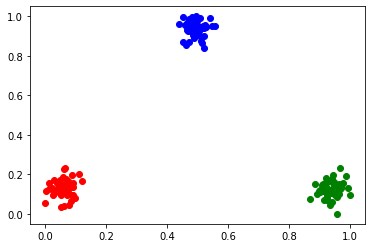

In [6]:
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X[i*50:(i+1)*50, 0], X[i*50:(i+1)*50, 1], c=colors[i])

## t-SNE

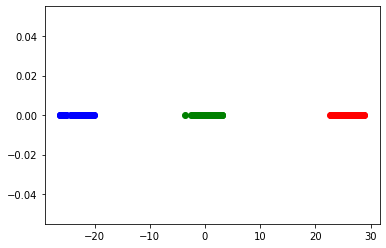

In [18]:
perplexity = 25
X_embedded = TSNE(n_components=1, perplexity=perplexity, learning_rate='auto', 
                  init='random').fit_transform(X)
for i in range(3):
    plt.scatter(X_embedded[i*50:(i+1)*50], np.zeros(50), c=colors[i])

## PCA

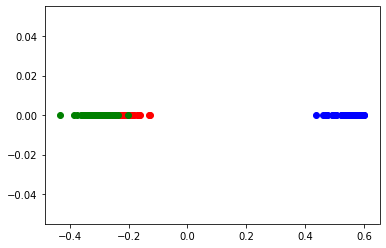

In [22]:
X_pca = PCA(n_components=1).fit_transform(X)
for i in range(3):
    plt.scatter(X_pca[i*50:(i+1)*50], np.zeros(50), c=colors[i])

## 困惑度(perplexity)測試

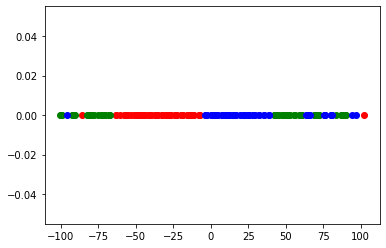

In [23]:
perplexity = 2
X_embedded = TSNE(n_components=1, perplexity=perplexity, learning_rate='auto', 
                  init='random').fit_transform(X)
for i in range(3):
    plt.scatter(X_embedded[i*50:(i+1)*50], np.zeros(50), c=colors[i])

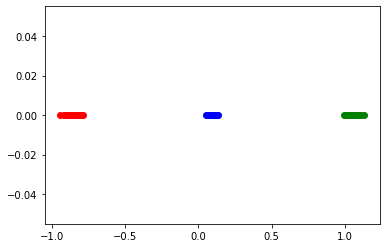

In [43]:
perplexity = 130
X_embedded = TSNE(n_components=1, perplexity=perplexity, learning_rate='auto', 
                  init='random').fit_transform(X)
for i in range(3):
    plt.scatter(X_embedded[i*50:(i+1)*50], np.zeros(50), c=colors[i])

# 非線性分離

## 生成S曲線資料

In [54]:
from matplotlib import ticker
from sklearn import manifold, datasets

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)
S_points.shape, S_color.shape

((1500, 3), (1500,))

## 定義繪圖函數

In [49]:
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()
    
def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()

## 繪製原始資料

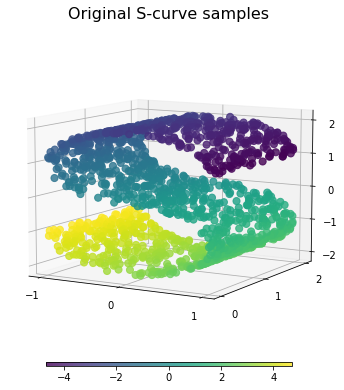

In [50]:
plot_3d(S_points, S_color, "Original S-curve samples")

## 繪製降維後資料

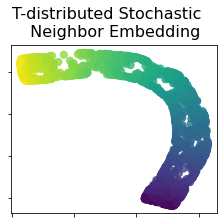

In [51]:
t_sne = manifold.TSNE(
    n_components=2,
    perplexity=30,
    init="random",
    n_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")